# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white')
#sns.color_palette('pastel', as_cmap=True)

## Load Dataset

In [2]:
df = pd.read_csv('data.csv')
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [4]:
print(df.shape)
df.describe()

(174389, 19)


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [5]:
corr = df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)

## Correlation Matrix

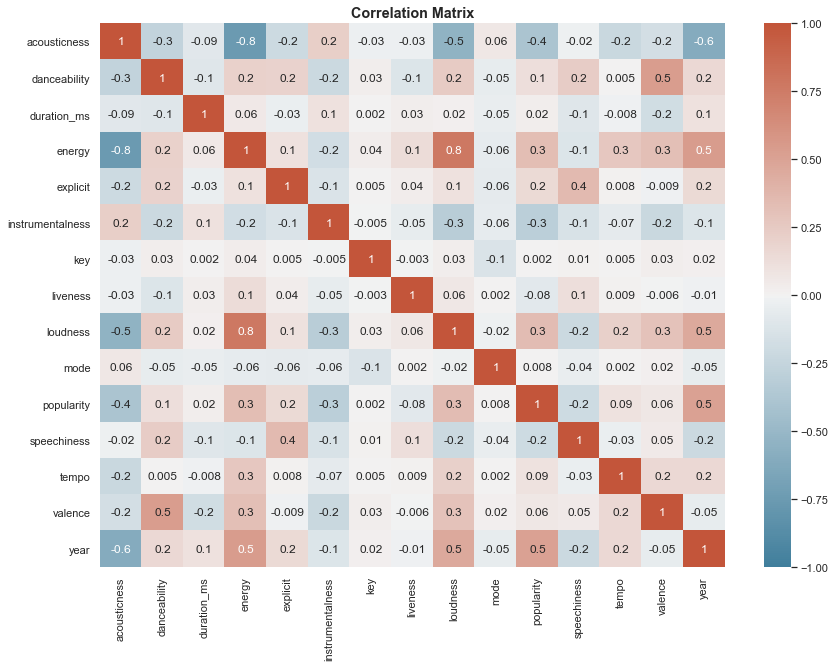

In [6]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap=cmap)
plt.title("Correlation Matrix", fontweight='bold', fontsize='large')
plt.show()

In [7]:
corr_mat = df.corr()
corr_pairs = corr_mat.unstack()
pos_corr = corr_pairs[(corr_pairs >= 0.5) & (corr_pairs < 1)]
print("Strong Positive Correlation is observed in the following pairs: \n", pos_corr)

neg_corr = corr_pairs[(corr_pairs <= -0.5) & (corr_pairs > -1)]
print("\nStrong Negative Correlation is observed in the following pairs: \n", neg_corr)

Strong Positive Correlation is observed in the following pairs: 
 danceability  valence         0.536713
energy        loudness        0.779267
              year            0.540850
loudness      energy          0.779267
popularity    year            0.513227
valence       danceability    0.536713
year          energy          0.540850
              popularity      0.513227
dtype: float64

Strong Negative Correlation is observed in the following pairs: 
 acousticness  energy         -0.750852
              loudness       -0.546639
              year           -0.607515
energy        acousticness   -0.750852
loudness      acousticness   -0.546639
year          acousticness   -0.607515
dtype: float64


In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
l = newdf.columns.values
len(l)

15

## Boxplots

**Plotting boxplots without outliers included. To turn on outliers set 'showfliers' to True.**

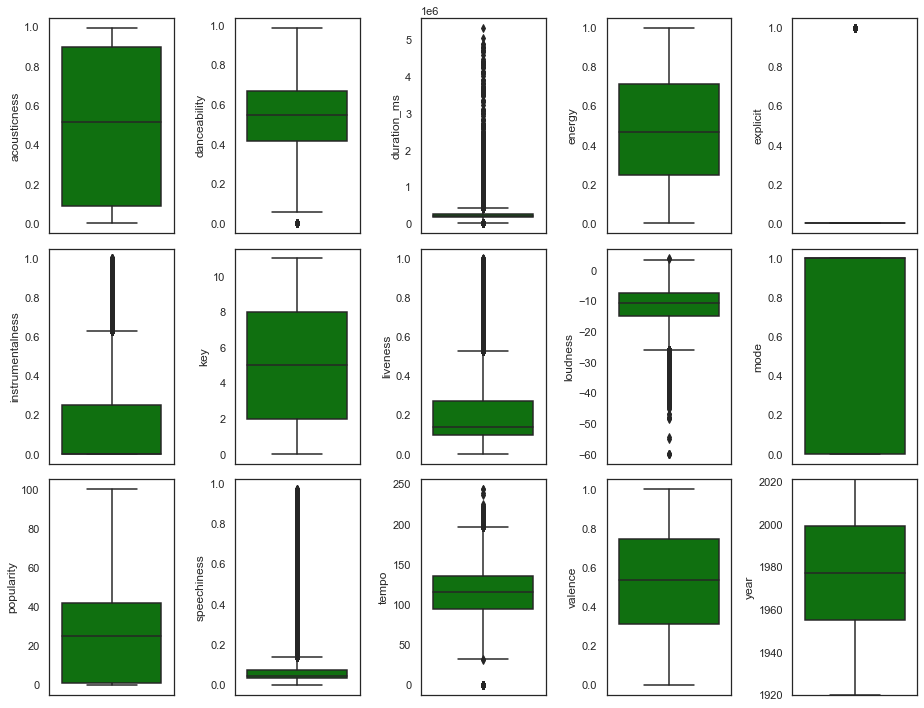

In [11]:
fig, axes = plt.subplots(3,5, figsize = (13,10))
a=0
for name in l:
    i,j = divmod(a, 5)
    sns.boxplot(y = newdf[name], ax = axes[i,j], color='green', showfliers=True)
    plt.ylim(newdf[name].min(),newdf[name].max())
    a += 1   

plt.tight_layout()
plt.show()

## Histograms

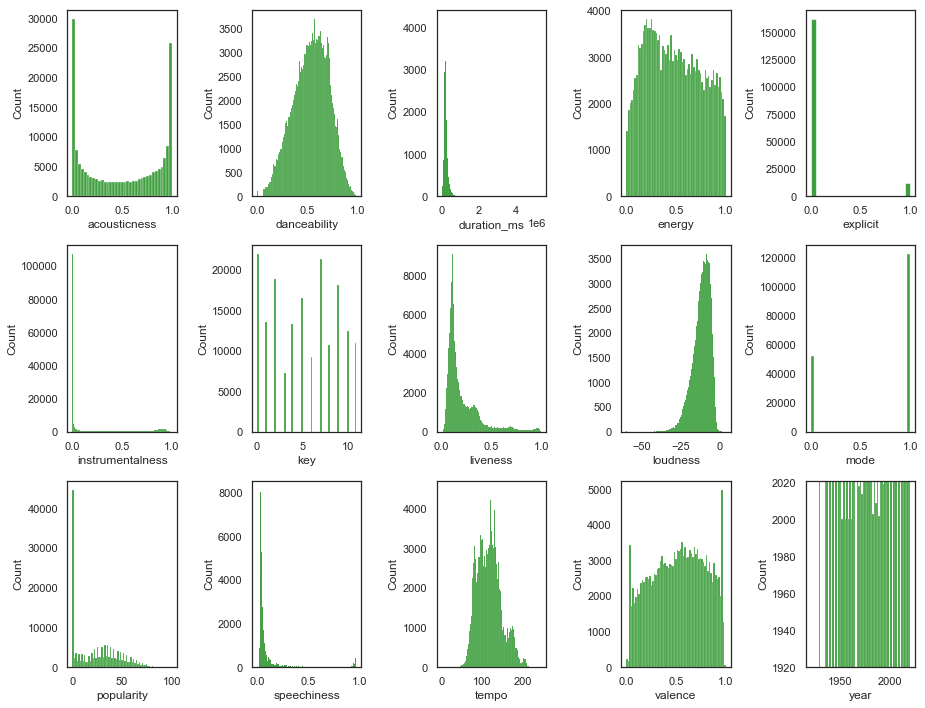

In [10]:
fig, axes = plt.subplots(3,5, figsize = (13,10))
a=0
for name in l:
    i,j = divmod(a, 5)
    sns.histplot(x = newdf[name], ax = axes[i,j], color='green')
    plt.ylim(newdf[name].min(),newdf[name].max())
    a += 1

plt.tight_layout()
plt.show()